In [ ]:
# Installing Packages  pandas, numpy, matplotlib sckit-learn tensor flow 

In [116]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [ ]:
# Importing the required library

In [84]:
# Loading the stock price data

In [86]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [88]:
#Preprocess the data : Convert the 'Data'  column to datetime format and sort the data in assecnding

In [90]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [92]:
# Split the data into training and testing sets: Typically, you would use around 80% of the data for training and the remaining 20% for testing.

In [94]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [98]:
# Scale the data: Normalize the stock prices using MinMaxScaler to bring them within a specific range (e.g., 0 to 1).

In [100]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['Close'].values.reshape(-1, 1))

In [102]:
 #Create the LSTM model: Define the architecture of the LSTM model using the Sequential API from Keras.

In [104]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [106]:
 #Compile and train the model: Compile the model with an appropriate loss function and optimizer, and then train it using the training data.

In [108]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_scaled, train_scaled, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 3s 3ms/step - loss: 0.1939
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0784
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 5.0631e-04
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 3.5193e-04
Epoch 10/10
26/26 [==============================] - 0s 3ms/step - loss: 3.3319e-04


In [109]:
#Use the trained model to make predictions on the test data.

In [110]:
predicted_scaled = model.predict(test_scaled)
predicted = scaler.inverse_transform(predicted_scaled)

7/7 [==============================] - 1s 4ms/step


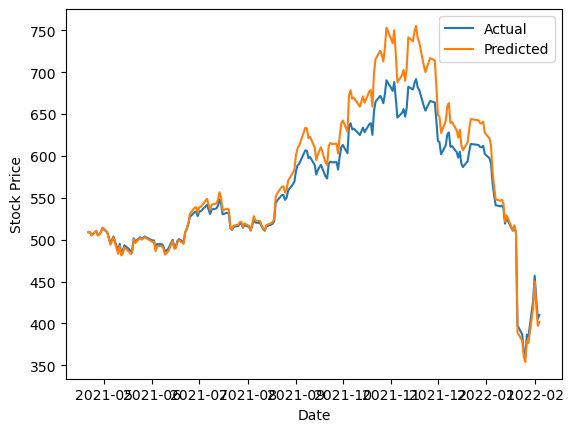

In [114]:
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()